In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
#import dataset
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Dataset Overview

The dataset contains **100,000 rows** and **18 columns**, representing customer-level information from a retail bank. Each row corresponds to a single customer, and the columns capture demographic, behavioral, and financial details, along with churn status.

---

### Key Column Descriptions

| Column Name         | Description |
|---------------------|-------------|
| **Tenure**          | Number of years the customer has been with the bank. This reflects customer loyalty and relationship length. |
| **NumOfProducts**   | Number of financial products the customer holds with the bank (e.g., accounts, loans, investments). |
| **HasCrCard**       | Indicates whether the customer owns a credit card (`1` for yes, `0` for no). |
| **Exited**          | Target variable indicating customer churn. `1` if the customer has left the bank, `0` otherwise. |
| **Complain**        | Binary indicator of whether the customer has lodged a complaint (`1` for yes, `0` for no). |
| **Satisfaction Score** | A numerical score representing the customer's satisfaction, particularly regarding complaint resolution. |
| **Card Type**       | The type of credit card the customer holds (e.g., Silver, Gold, Platinum). |
| **Points Earned**   | Reward points accumulated by the customer through credit card usage. Reflects engagement and activity. |

---

In [3]:
#check missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
#check data distribution for continuous variable
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [5]:
#check data type
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

Data analysis

<AxesSubplot:>

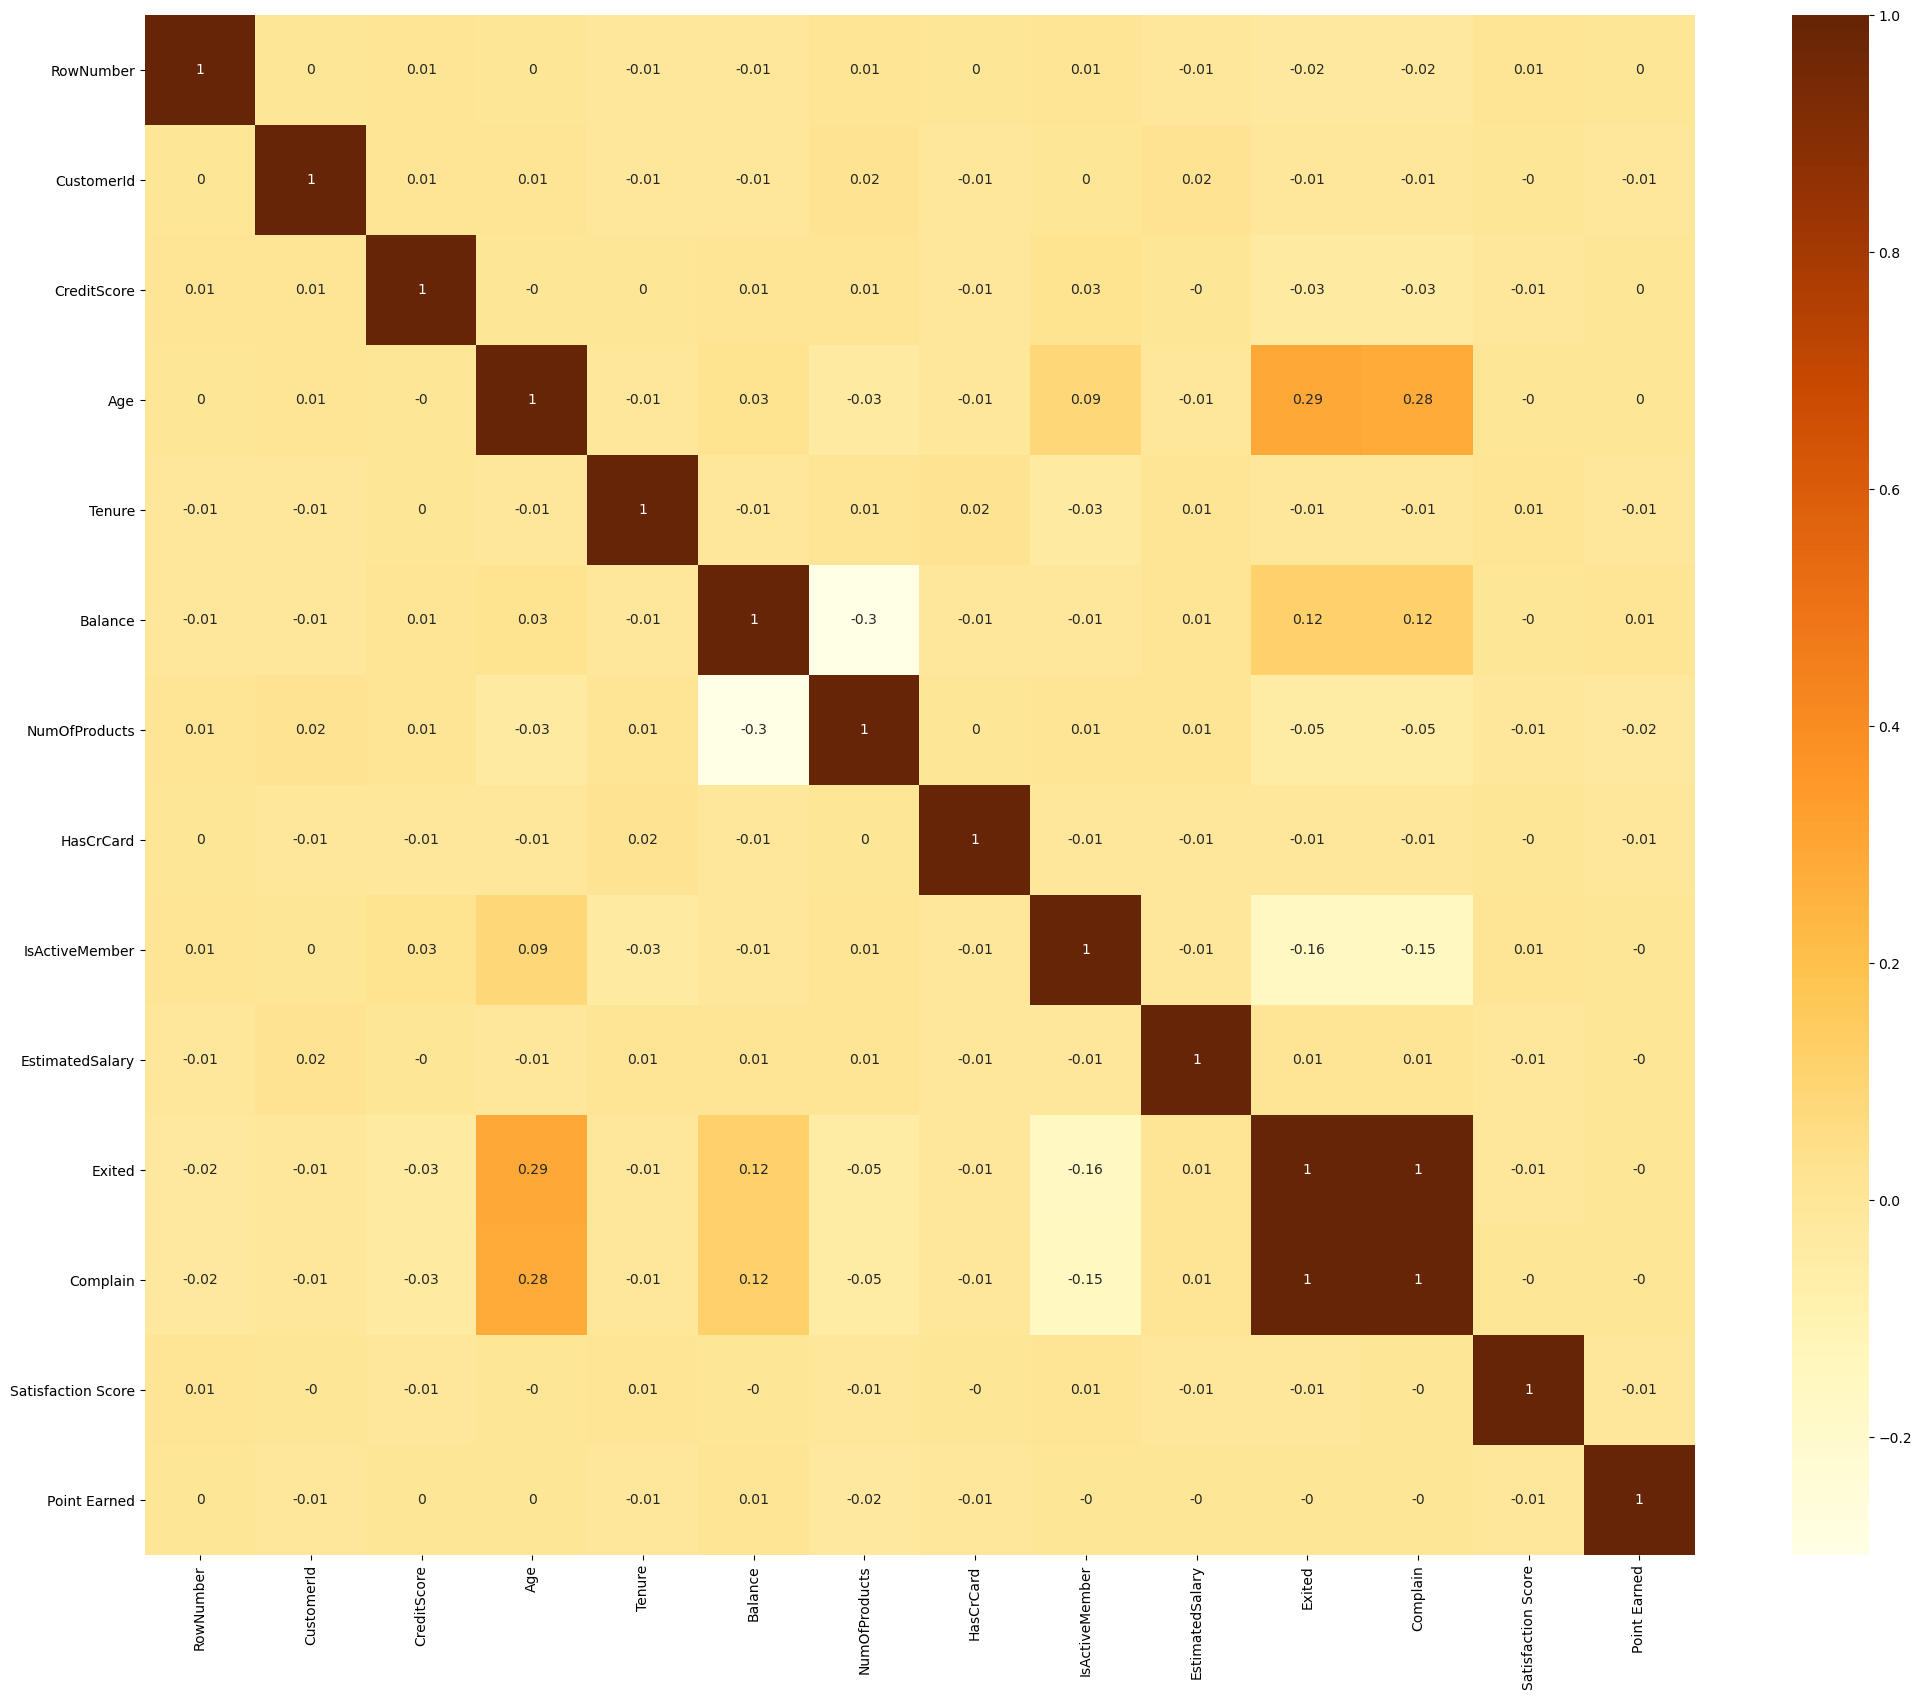

In [6]:
#analyze correlation between variables
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

target variable has 100% correlation with Complain, so drop complain variable

In [7]:
df = df.drop('Complain',axis=1)

Data Distribution - Categorical Variables

<AxesSubplot:title={'center':'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

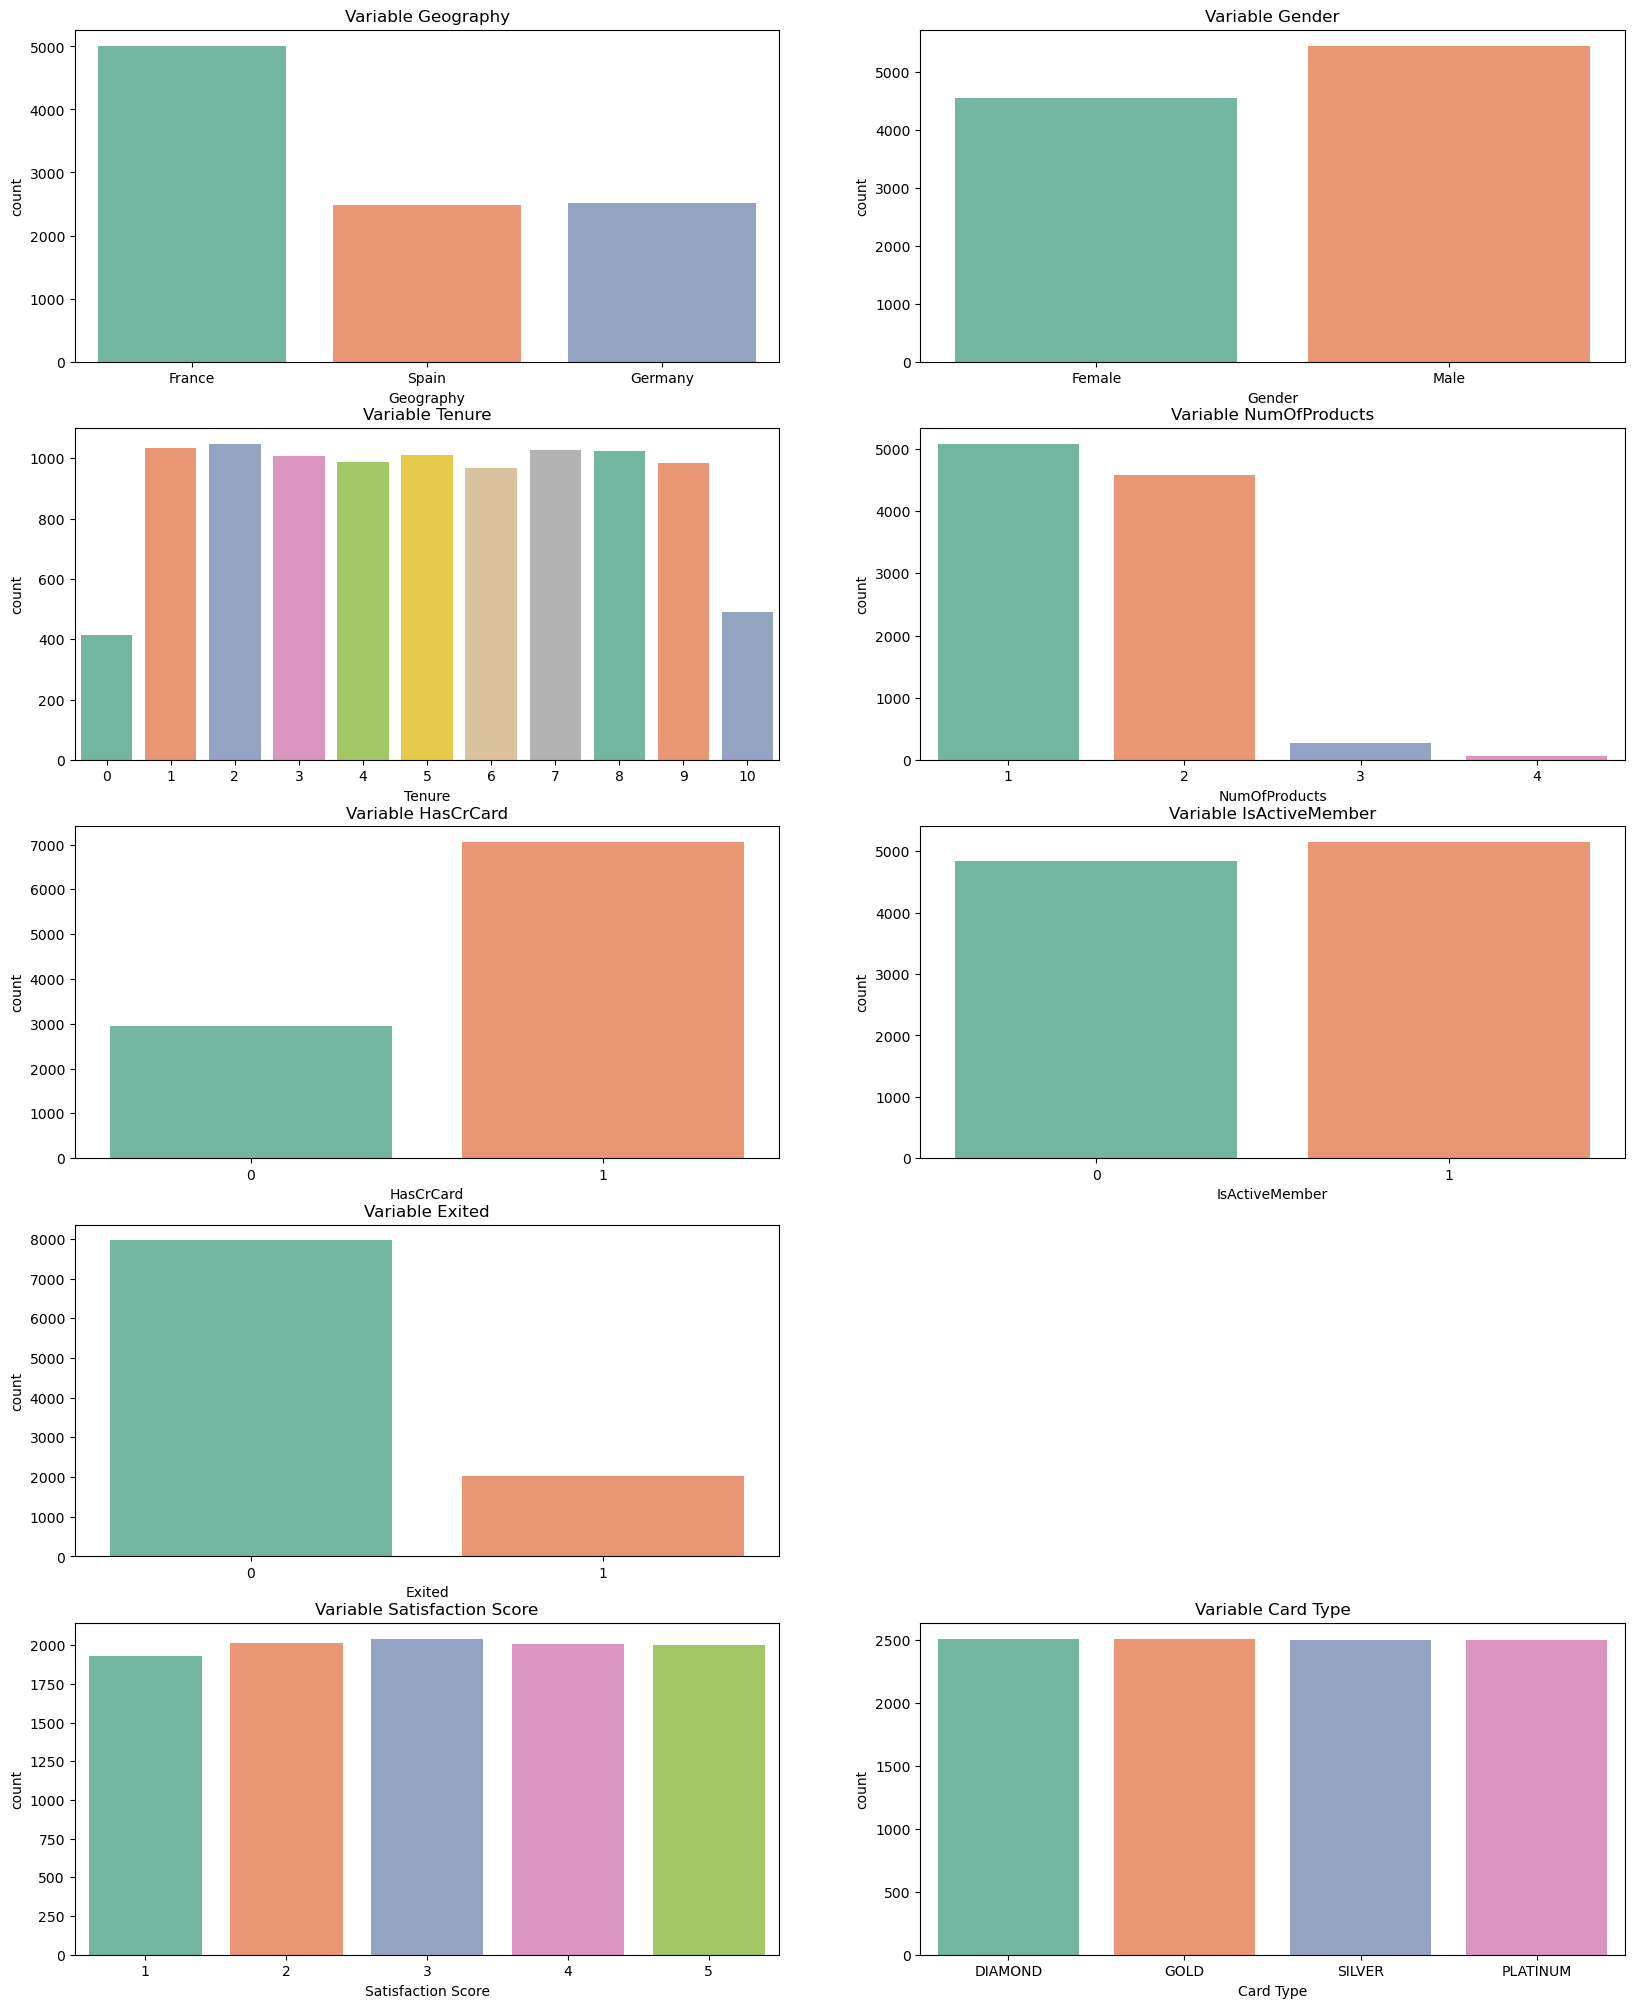

In [8]:
plt.figure(figsize = (20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Exited')
sns.countplot(x = 'Exited', palette = 'Set2', data = df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', palette = 'Set2', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', palette = 'Set2', data = df)

Based on the charts, our data well distributed. Most of our customers from France, and customers usually have 1 or 2 products with the firm. But our target variable is not well distributed, we'll have to use resample techniques to balance the class

Continuous Variables

<AxesSubplot:xlabel='Point Earned', ylabel='Count'>

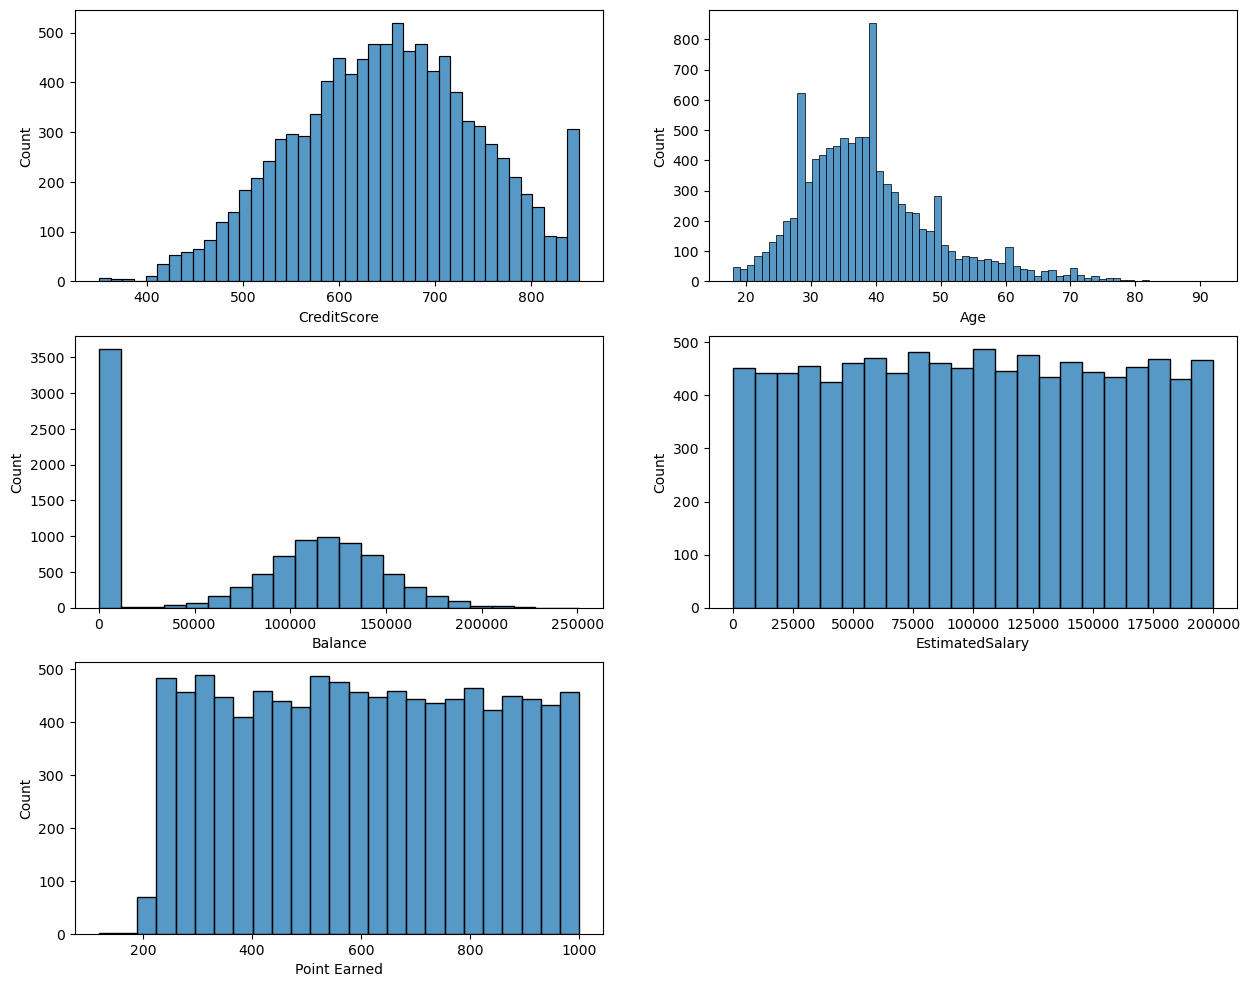

In [9]:
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x = df['CreditScore'], kde = False)

plt.subplot(3, 2, 2)
sns.histplot(x = df['Age'], kde = False)

plt.subplot(3, 2, 3)
sns.histplot(x = df['Balance'], kde = False)

plt.subplot(3, 2, 4)
sns.histplot(x = df['EstimatedSalary'], kde = False)

plt.subplot(3, 2, 5)
sns.histplot(x = df['Point Earned'], kde = False)

Looking at the histograms, most of customers have balance close to 0, and estiamted salary is distriubted similar across ranges

Check Outlier - Boxplot

<AxesSubplot:title={'center':'Boxplot CreditScore'}, xlabel='CreditScore'>

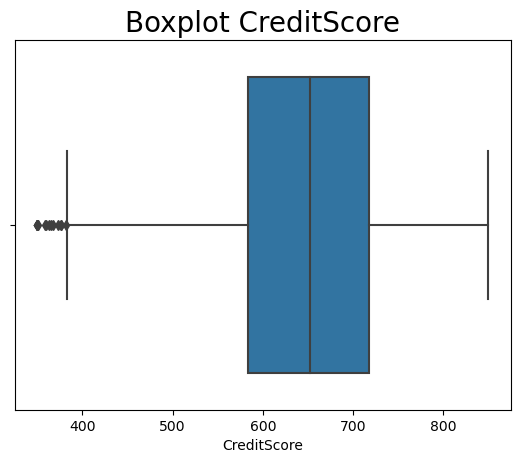

In [10]:
plt.title(('Boxplot CreditScore'), fontdict={'fontsize':20})
sns.boxplot(x=df['CreditScore'])

<AxesSubplot:title={'center':'Boxplot Balance'}, xlabel='Balance'>

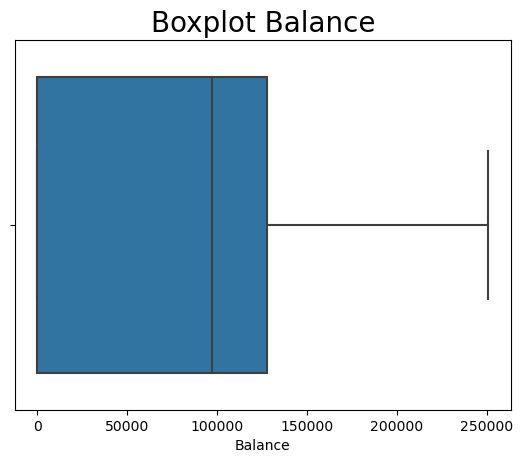

In [11]:
plt.title("Boxplot Balance", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Balance"])

<AxesSubplot:title={'center':'Boxplot EstimatedSalary'}, xlabel='EstimatedSalary'>

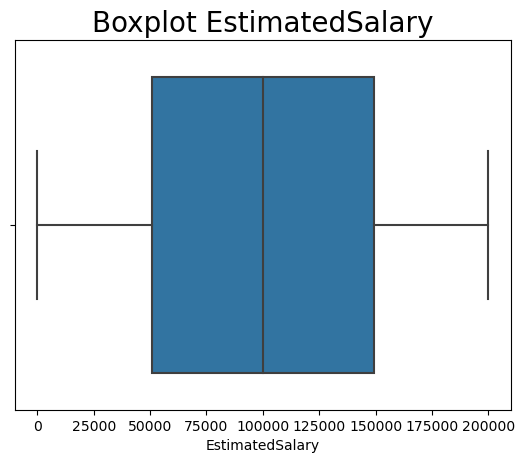

In [12]:
plt.title("Boxplot EstimatedSalary", fontdict = {'fontsize': 20})
sns.boxplot(x=df["EstimatedSalary"])

<AxesSubplot:title={'center':'Boxplot Age'}, xlabel='Age'>

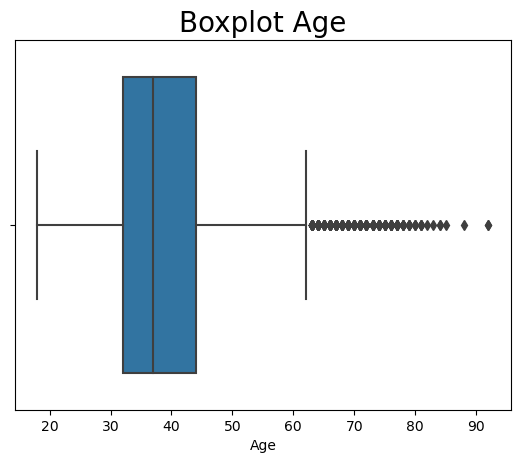

In [13]:
plt.title("Boxplot Age", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Age"])

<AxesSubplot:title={'center':'Boxplot Balance'}, xlabel='Balance'>

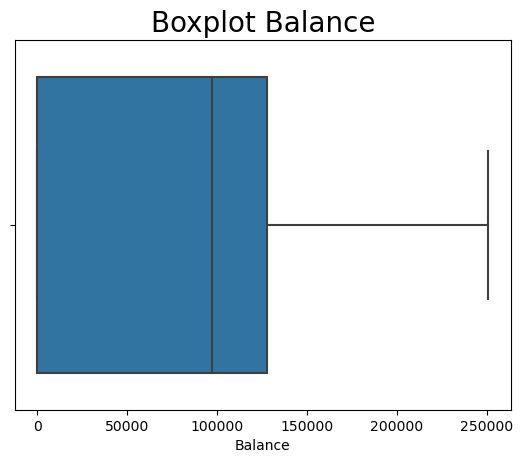

In [14]:
plt.title("Boxplot Balance", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Balance"])

<AxesSubplot:title={'center':'Boxplot EstimatedSalary'}, xlabel='EstimatedSalary'>

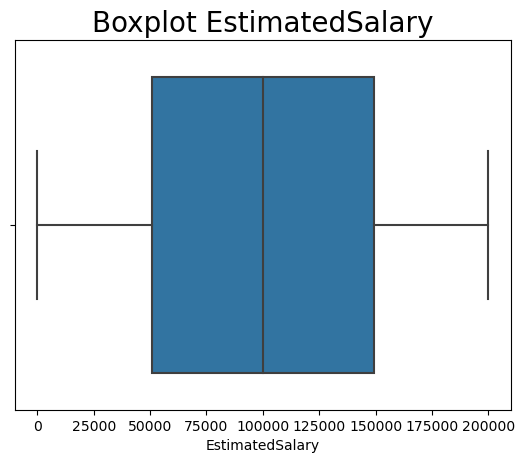

In [15]:
plt.title("Boxplot EstimatedSalary", fontdict = {'fontsize': 20})
sns.boxplot(x=df["EstimatedSalary"])

<AxesSubplot:title={'center':'Boxplot Point Earned'}, xlabel='Point Earned'>

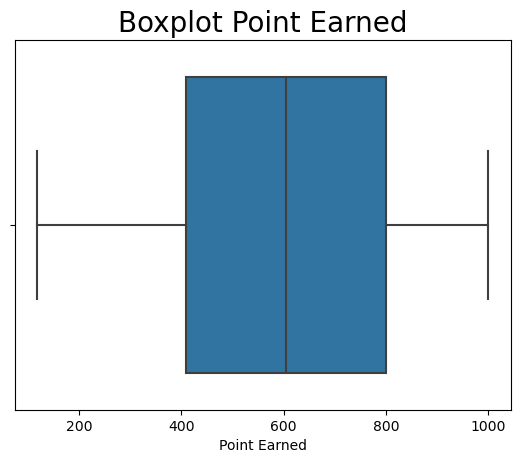

In [16]:
plt.title("Boxplot Point Earned", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Point Earned"])

Bivariate Analysis - Comparing our categorical variables with our target variable 

Categorical Variable

<AxesSubplot:title={'center':'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

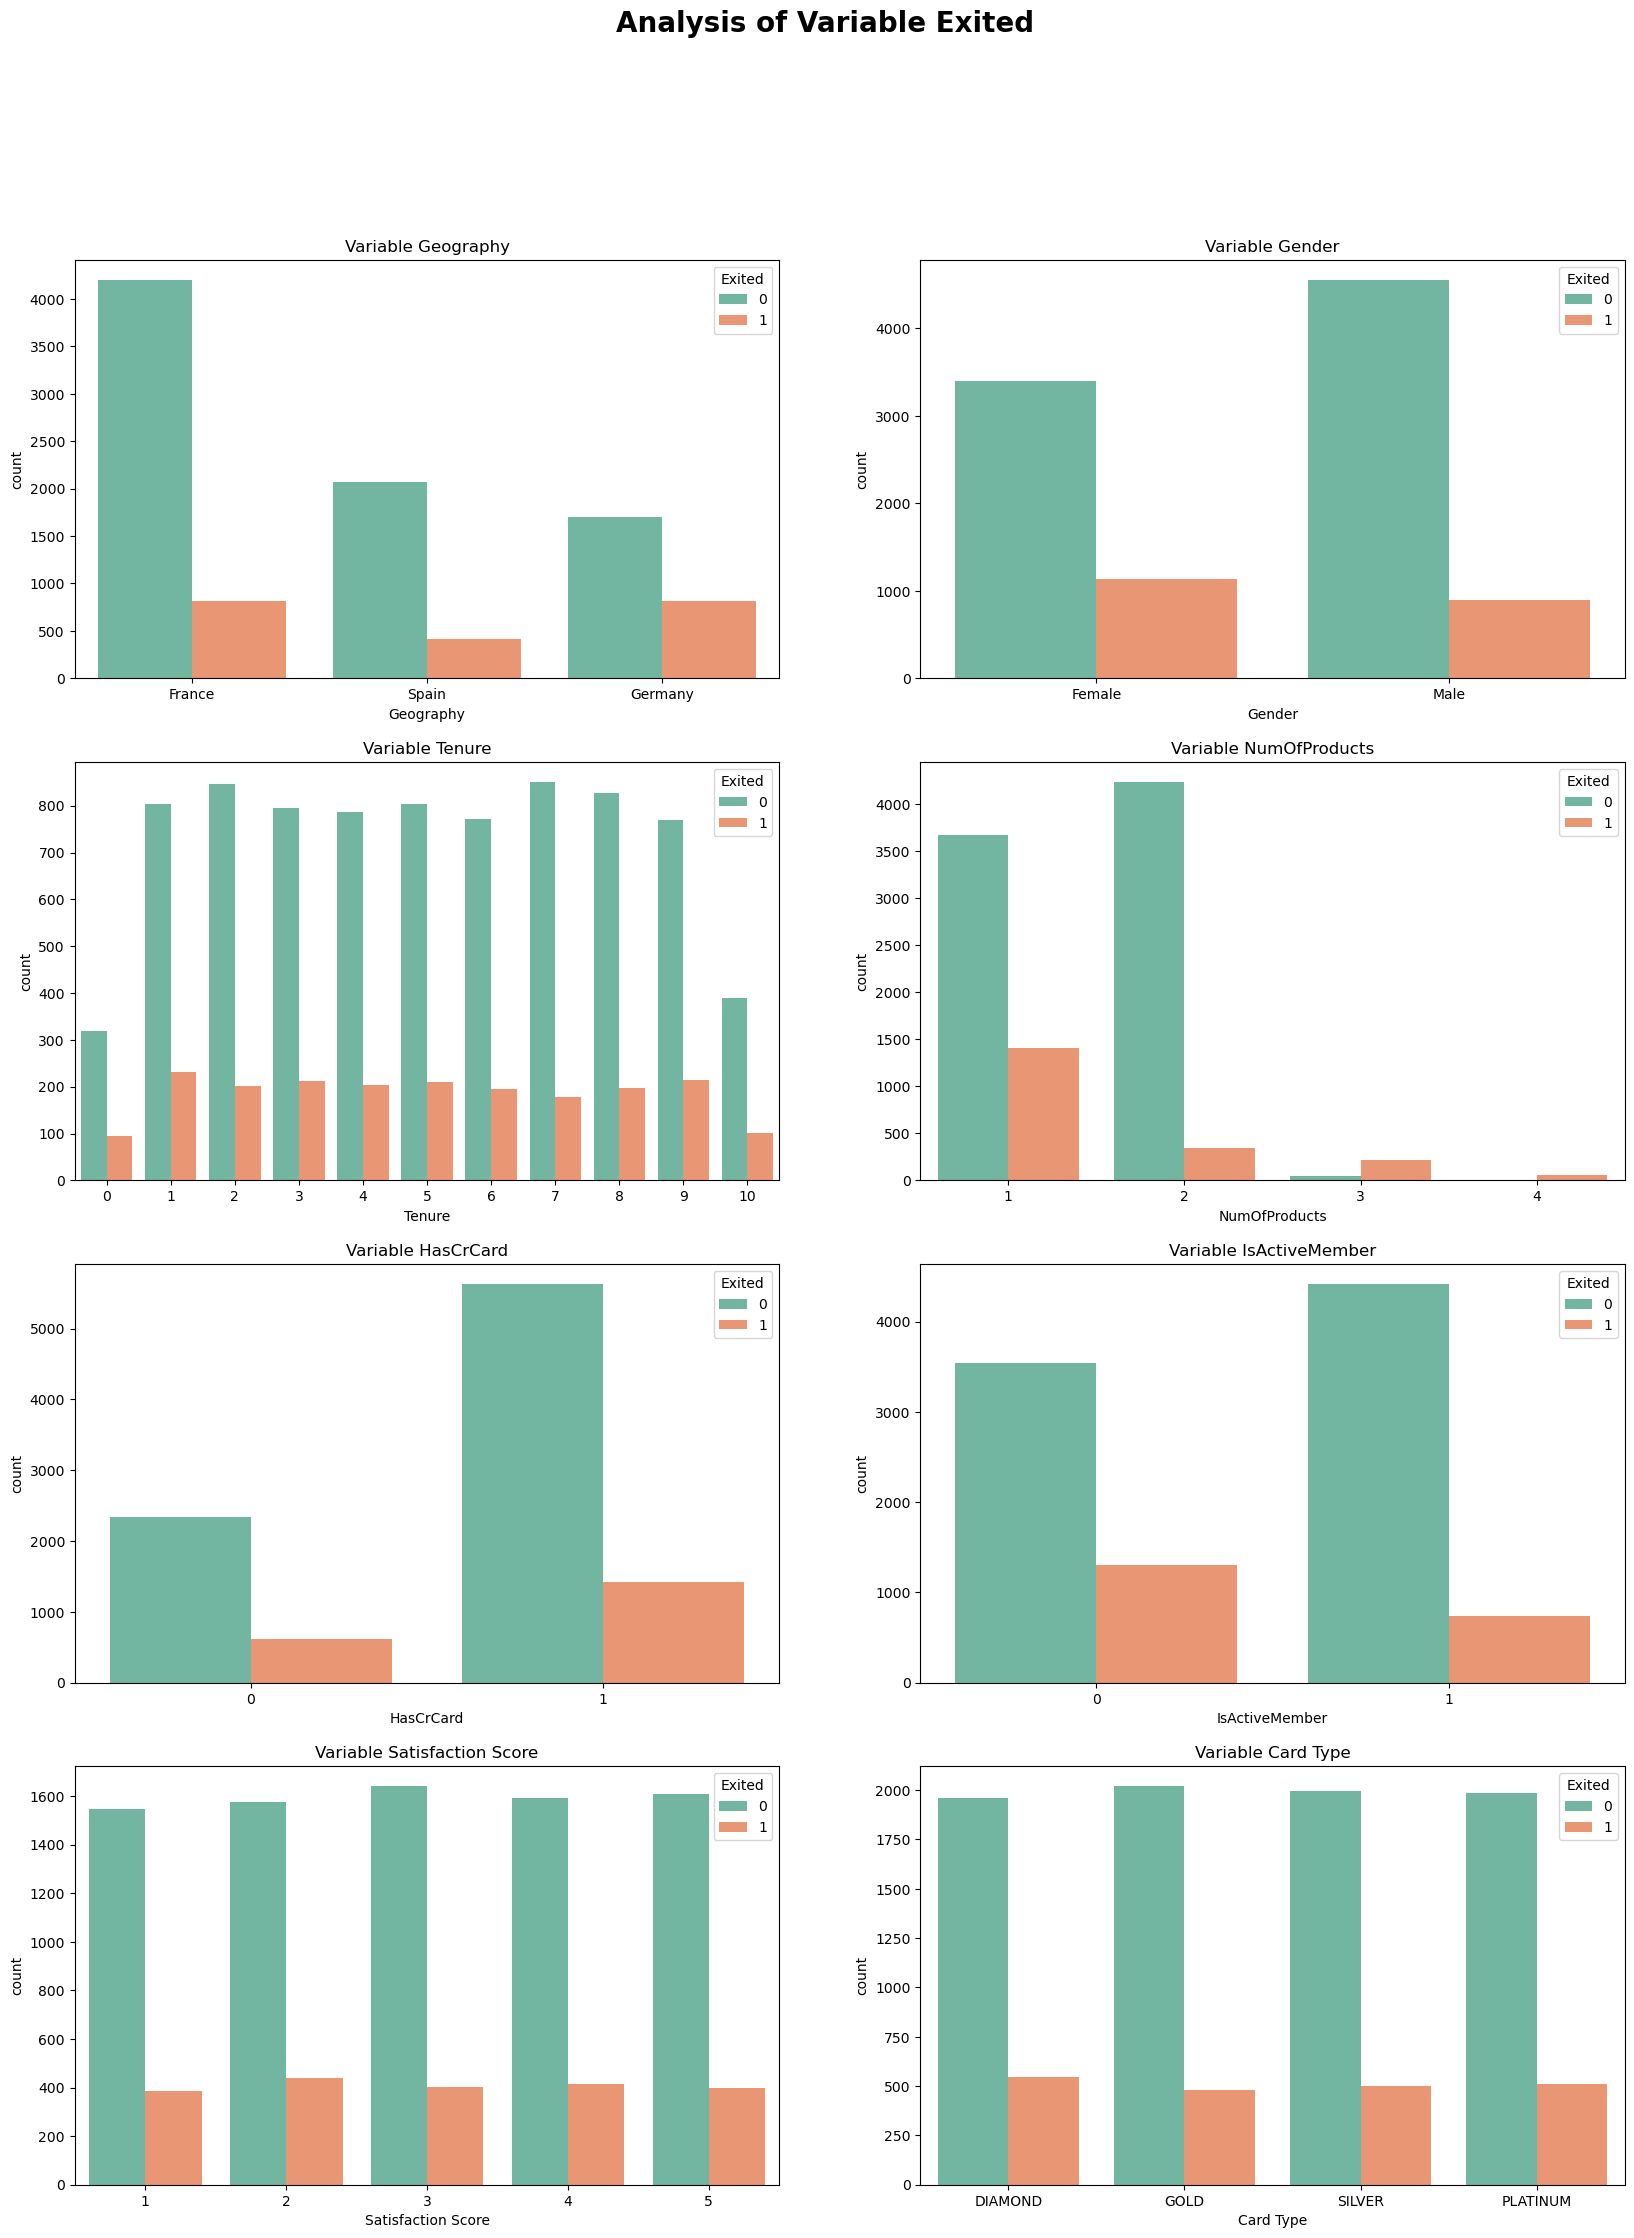

In [17]:
plt.figure(figsize=(20,25))
plt.suptitle('Analysis of Variable Exited',fontweight='bold',fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'Set2', data = df)

Continuous Variable

<AxesSubplot:xlabel='Exited', ylabel='Point Earned'>

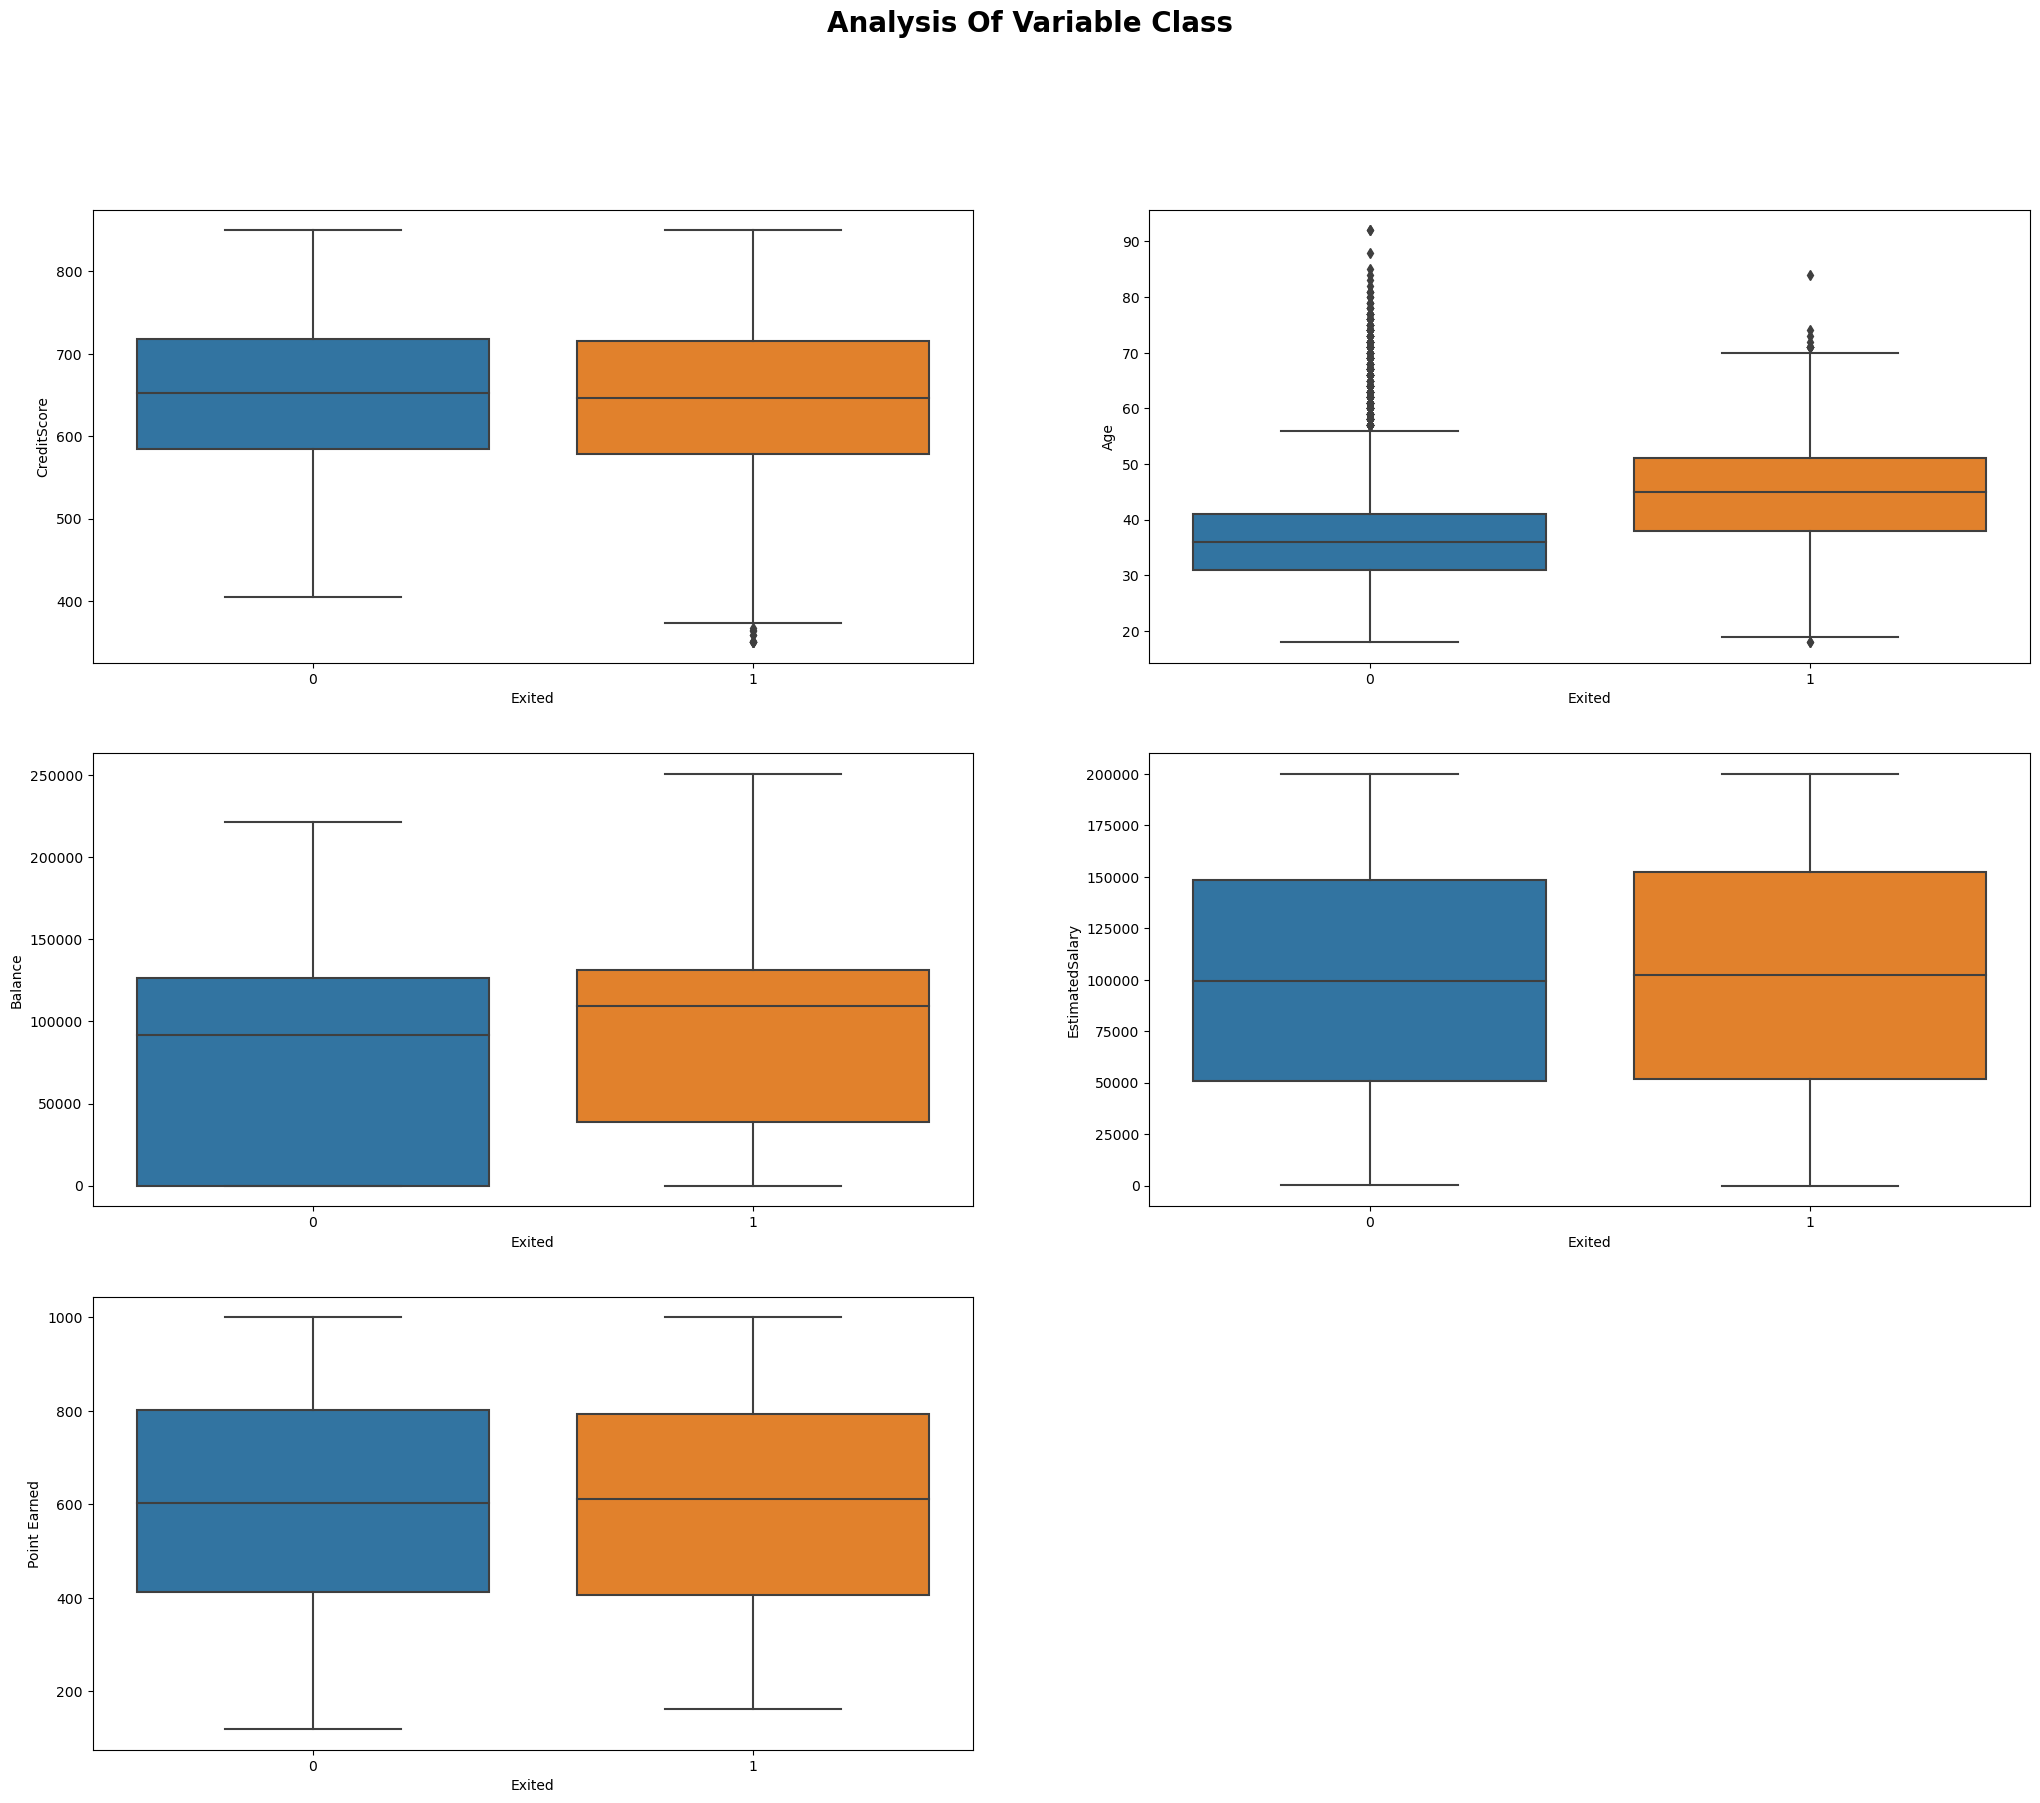

In [18]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=df)

Older customers have a lower likelihood of leaving the firm

In [19]:
#drop usless column
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [20]:
#OneHot Encoder
hot = pd.get_dummies(df[['Geography','Gender','Card Type']])

In [21]:
#remove columns after implementing one hot
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

# Modeling Building

In [22]:
#Separating features into dependent and independent variables
X = df.drop('Exited',axis=1)
X = X.values
y = df['Exited']

In [23]:
#standardlize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [24]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_standard,y,test_size=0.3,random_state=0)

In [25]:
#Balance Classes - oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train,y_train = ros.fit_resample(X_train,y_train)

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=1,max_iter = 1000)
logistic.fit(X_train,y_train)
log_pred_train = logistic.predict(X_train)
log_pred = logistic.predict(X_test)

In [27]:
print('Logistic Regression accuracy score for train model: %.3f: test model: %.3f' %
      (accuracy_score(y_train,log_pred_train),accuracy_score(y_test,log_pred)))

Logistic Regression accuracy score for train model: 0.708: test model: 0.706


In [28]:
cm_log = confusion_matrix(y_test,log_pred)
cm_log

array([[1668,  710],
       [ 171,  451]], dtype=int64)

# Decision Tree

In [29]:
#GridSearch
parameters = {'max_depth':[3,4,5,6,7,9,11],'min_samples_split':[2,3,4,5,6,7],
             'criterion':['entropy','gini']}
d_mo = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(d_mo,parameters,cv=3,n_jobs=-1)
gridDecisionTree.fit(X_train,y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  3
Max Nvl:  11
Algorithm:  entropy
Score:  0.8369452727859588


In [31]:
#decision tree model
decision_tree = DecisionTreeClassifier(criterion='entropy',min_samples_split=3,max_depth=11,random_state=0)
decision_tree.fit(X_train,y_train)
decision_pred_train = decision_tree.predict(X_train)
decision_pred = decision_tree.predict(X_test)

print('Decision Tree accuracy score for train model: %.3f: test model: %.3f' %
      (accuracy_score(y_train,decision_pred_train),accuracy_score(y_test,decision_pred)))

Decision Tree accuracy score for train model: 0.881: test model: 0.766


In [32]:
cm_dt = confusion_matrix(y_test,decision_pred)
cm_dt

array([[1869,  509],
       [ 193,  429]], dtype=int64)

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
#GridSearch
parameters = {'max_depth':[3,4,5,6,7,9,11],'min_samples_split':[2,3,4,5,6,7],
             'criterion':['entropy','gini']}
rf_mo = RandomForestClassifier()
gridrf = RandomizedSearchCV(rf_mo,parameters,cv=5,n_jobs=-1)
gridrf.fit(X_train,y_train)

print('Mín Split: ', gridrf.best_estimator_.min_samples_split)
print('Max Nvl: ', gridrf.best_estimator_.max_depth)
print('Algorithm: ', gridrf.best_estimator_.criterion)
print('Score: ', gridrf.best_score_)

Mín Split:  6
Max Nvl:  11
Algorithm:  gini
Score:  0.8951474204183121


In [34]:
#random forest model
R_f = RandomForestClassifier(criterion='gini',min_samples_split=6,max_depth=11,random_state=0)
R_f.fit(X_train,y_train)
R_f_pred_train = R_f.predict(X_train)
R_f_pred = R_f.predict(X_test)

print('Random Forest accuracy score for train model: %.3f: test model: %.3f' %
      (accuracy_score(y_train,R_f_pred_train),accuracy_score(y_test,R_f_pred)))

Random Forest accuracy score for train model: 0.946: test model: 0.840


In [35]:
cm_rf = confusion_matrix(y_test,R_f_pred)
cm_rf

array([[2089,  289],
       [ 192,  430]], dtype=int64)

# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
nb_pred_train = naive_bayes.predict(X_train)
nb_pred = naive_bayes.predict(X_test)

print('Naive Bayes accuracy score for train model: %.3f: test model: %.3f' %
      (accuracy_score(y_train,nb_pred_train),accuracy_score(y_test,nb_pred)))

Naive Bayes accuracy score for train model: 0.703: test model: 0.711


In [37]:
cm_nb = confusion_matrix(y_test,nb_pred)
cm_nb

array([[1698,  680],
       [ 188,  434]], dtype=int64)

# AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
parameters = {'learning_rate':[0.01,0.02,0.05,0.07,0.09, 0.1, 0.3, 0.5, 0.005],'n_estimators':[300,500]}

adamodel = AdaBoostClassifier()
gridAdaBoost = RandomizedSearchCV(adamodel,parameters,cv=3,n_jobs=-1)
gridAdaBoost.fit(X_train,y_train)

print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Estimator: ', gridAdaBoost.best_estimator_.n_estimators)
print('Score: ', gridAdaBoost.best_score_)


Learning Rate:  0.5
Estimator:  300
Score:  0.7779367827845832


In [39]:
ada_boost = AdaBoostClassifier(n_estimators=300,learning_rate=0.5,random_state=0)
ada_boost.fit(X_train,y_train)
ada_pred_train = ada_boost.predict(X_train)
ada_pred = ada_boost.predict(X_test)

print('AdaBoost accuracy score for train model: %.3f: test model: %.3f' %
      (accuracy_score(y_train,ada_pred_train),accuracy_score(y_test,ada_pred)))

AdaBoost accuracy score for train model: 0.786: test model: 0.779


In [40]:
cm_ada = confusion_matrix(y_test,ada_pred)
cm_ada

array([[1852,  526],
       [ 137,  485]], dtype=int64)

# Gradient Boost

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005],
              'n_estimators': [300, 500]
             }


model = GradientBoostingClassifier()
gridGradient = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridGradient.fit(X_train, y_train)

print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Estimator: ', gridGradient.best_estimator_.n_estimators)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.5
Estimator:  500
Score:  0.93159039891976


In [42]:
grad_boost = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.5, random_state = 0)
grad_boost.fit(X_train, y_train)
grad_boost_pred_train = grad_boost.predict(X_train)
grad_boost_pred = grad_boost.predict(X_test)

print('Gradient Boost accuracy score for train model: %.3f: test model: %.3f' %
      (accuracy_score(y_train,grad_boost_pred_train),accuracy_score(y_test,grad_boost_pred)))

Gradient Boost accuracy score for train model: 0.993: test model: 0.813


In [43]:
cm_gb = confusion_matrix(y_test,grad_boost_pred)
cm_gb

array([[2066,  312],
       [ 250,  372]], dtype=int64)

# XGBoost

In [44]:
from xgboost.sklearn import XGBClassifier

parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }

model = XGBClassifier()
xgb_grid = RandomizedSearchCV(model,parameters, cv = 2, n_jobs = -1)
xgb_grid.fit(X_train, y_train)

print('Score: ', xgb_grid.best_score_)
print('Params: ', xgb_grid.best_params_)

Score:  0.9036532951289398
Params:  {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.8, 'gamma': 0.7, 'colsample_bytree': 0.7}


In [45]:
xgb = XGBClassifier(subsample = 0.9, reg_lambda = 0.1, reg_alpha = 0.1, n_estimators = 500, min_child_weight = 3, max_depth = 7, learning_rate = 0.8, gamma = 0.7, colsample_bytree = 0.7, random_state = 0)
xgb.fit(X_train, y_train)
xgb_pred_train = xgb.predict(X_train)
xgb_pred = xgb.predict(X_test)

In [46]:
print('XGBoost accuracy score for train model: %.3f: test model: %.3f' %
      (accuracy_score(y_train,xgb_pred_train),accuracy_score(y_test,xgb_pred)))

XGBoost accuracy score for train model: 0.997: test model: 0.826


In [47]:
cm_xgb = confusion_matrix(y_test,xgb_pred)
cm_xgb

array([[2108,  270],
       [ 252,  370]], dtype=int64)

In [48]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'FP':cm_nb[0,1],
               'FN':cm_nb[1,0],
               'Precision':accuracy_score(y_test,nb_pred)}

Decision_dict = {'Model':'Decision Tree',
               'FP':cm_dt[0,1],
               'FN':cm_dt[1,0],
               'Precision':accuracy_score(y_test,decision_pred)}

Random_dict = {'Model':'Random Forest',
               'FP':cm_rf[0,1],
               'FN':cm_rf[1,0],
               'Precision':accuracy_score(y_test,R_f_pred)}


Logistic_dict_v1 = {'Model':'Logistic Regression',
               'FP':cm_log[0,1],
               'FN':cm_log[1,0],
               'Precision':accuracy_score(y_test,log_pred)}

ada_dict_v1 = {'Model':'AdaBoost',
               'FP':cm_ada[0,1],
               'FN':cm_ada[1,0],
               'Precision':accuracy_score(y_test,ada_pred)}

grad_dict_v1 = {'Model':'GradientBoost',
               'FP':cm_gb[0,1],
               'FN':cm_gb[1,0],
               'Precision':accuracy_score(y_test,grad_boost_pred)}

xgb_dict_v1 = {'Model':'XGB',
               'FP':cm_xgb[0,1],
               'FN':cm_xgb[1,0],
               'Precision':accuracy_score(y_test,xgb_pred)}

resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                       'AdaBoost':pd.Series(ada_dict_v1),
                       'GradientBoosting':pd.Series(grad_dict_v1),
                       'XGB':pd.Series(xgb_dict_v1)
                      })

resume

,Naive Bayes,Decision Tree,Random Forest,Logistic Regression,AdaBoost,GradientBoosting,XGB
Model,Naive Bayes,Decision Tree,Random Forest,Logistic Regression,AdaBoost,GradientBoost,XGB
FP,680,509,289,710,526,312,270
FN,188,193,192,171,137,250,252
Precision,0.710667,0.766,0.839667,0.706333,0.779,0.812667,0.826


We evaluated several models for predicting customer churn using precision, false positives (FP), and false negatives (FN) as key performance metrics. Among all models, Random Forest achieved the highest precision (0.84), meaning it was most effective at correctly identifying churners while minimizing false alarms. It also maintained a relatively low number of false positives (288) and moderate false negatives (191), making it a strong all-around performer.

AdaBoost, on the other hand, had the lowest number of false negatives (133), which means it captured the most actual churners, a crucial factor if the business goal is to reduce customer loss. Its precision (0.7853) was slightly lower than Random Forest but still competitive, making it well-suited for recall-focused applications.

Based on the trade-offs, we recommend using AdaBoost when it’s important to catch as many churners as possible, and Random Forest when precision and balanced performance are more important for the business.